First, packages are imported.

In [46]:
#   import packages
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import networkx as nx
import pickle
import functools

from ema_workbench import (
    Model,
    Policy,
    Scenario,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
    util,
    ScalarOutcome,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.em_framework.optimization import ArchiveLogger, EpsilonProgress
from ema_workbench.em_framework import parameters_from_csv
from ema_workbench.em_framework.evaluators import BaseEvaluator
from ema_workbench.analysis import parcoords
from ema_workbench.analysis import prim
from ema_workbench import Samplers

Load results from Uncertainty Analysis

In [71]:
uncertainty_results_run = pd.read_pickle(r'../generated_datasets/policy_uncertainty_test.pkl')
outcomes_overijssel = pd.read_pickle(r'..\generated_datasets\policy_all_scenarios.pkl')

experiments, results = uncertainty_results_run

# PRIM
Prim is performed, the threshold and peel alpha values are gathered through testing.

### PRIM for total cost overijssel:

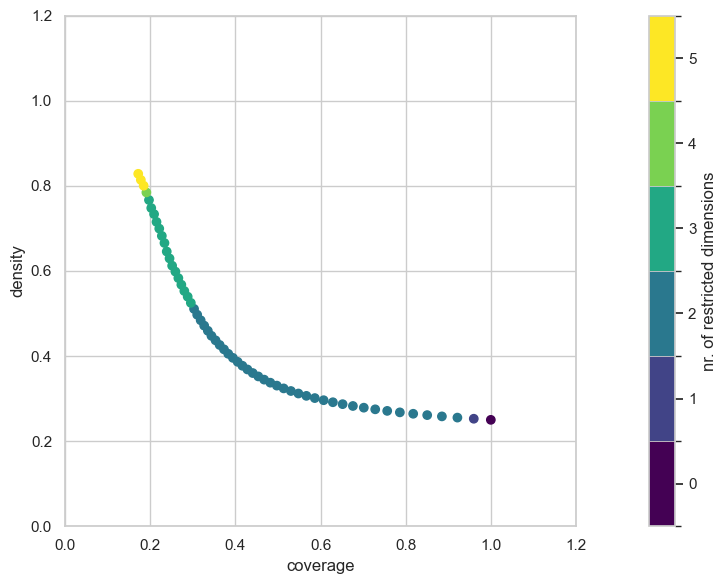

In [87]:
x = experiments.iloc[:, :19]
y = outcomes_overijssel['total_cost[€]_overijssel'].values
y = y > np.percentile(y, 75)

prim_alg = prim.Prim(x,
                     y,
                     threshold=0.75,
                     peel_alpha=0.05, )
box = prim_alg.find_box()

box.show_tradeoff()
plt.tight_layout()

coverage     0.171573
density      0.828057
id          57.000000
mass         0.051800
mean         0.828057
res_dim      5.000000
Name: 57, dtype: float64

             box 57                                  
                min       max       qp value qp value
A.5_pfail  0.000063  0.124749            NaN      0.0
A.1_pfail  0.339324  0.999880   0.000000e+00      NaN
A.3_pfail  0.228755  0.999895  4.307869e-239      NaN
A.4_pfail  0.044241  0.999873   1.725595e-09      NaN
A.2_pfail  0.038736  0.999896   1.346024e-06      NaN



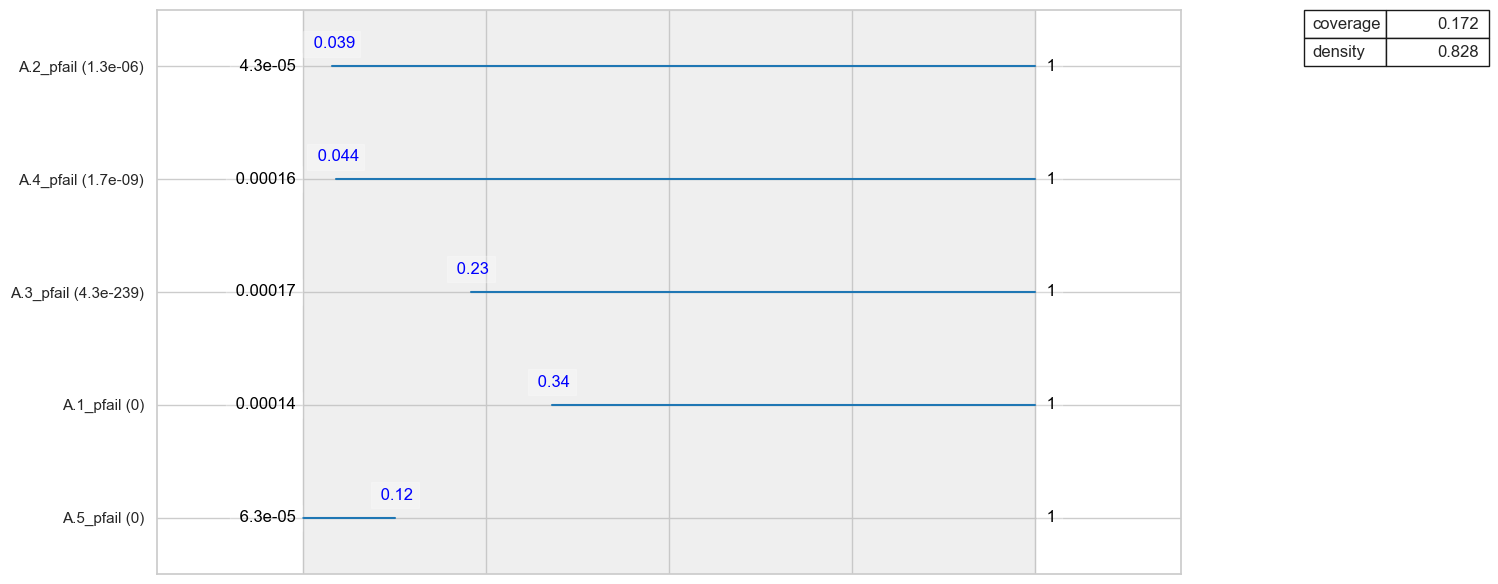

In [88]:
box.inspect()
box.inspect(style='graph')
plt.tight_layout()

### Prim for total cost Gelderland and Overijssel combined:

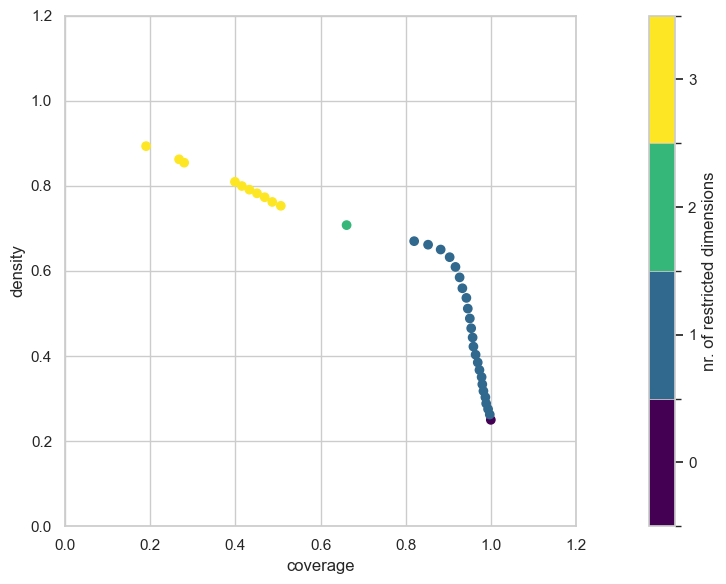

In [89]:
x = experiments.iloc[:, :19]
y = outcomes_overijssel['total_cost[€]'].values
y = y > np.percentile(y, 75)

prim_alg = prim.Prim(x,
                     y,
                     threshold=0.75,
                     peel_alpha=0.05, )
box = prim_alg.find_box()

box.show_tradeoff()
plt.tight_layout()

coverage     0.190048
density      0.893066
id          34.000000
mass         0.053200
mean         0.893066
res_dim      3.000000
Name: 34, dtype: float64

                     box 34                                   
                        min         max      qp value qp value
A.1_pfail          0.000138    0.210914           NaN      0.0
discount rate 1  {1.5, 2.5}  {1.5, 2.5}  2.419034e-99      NaN
discount rate 0  {1.5, 2.5}  {1.5, 2.5}  1.017117e-82      NaN



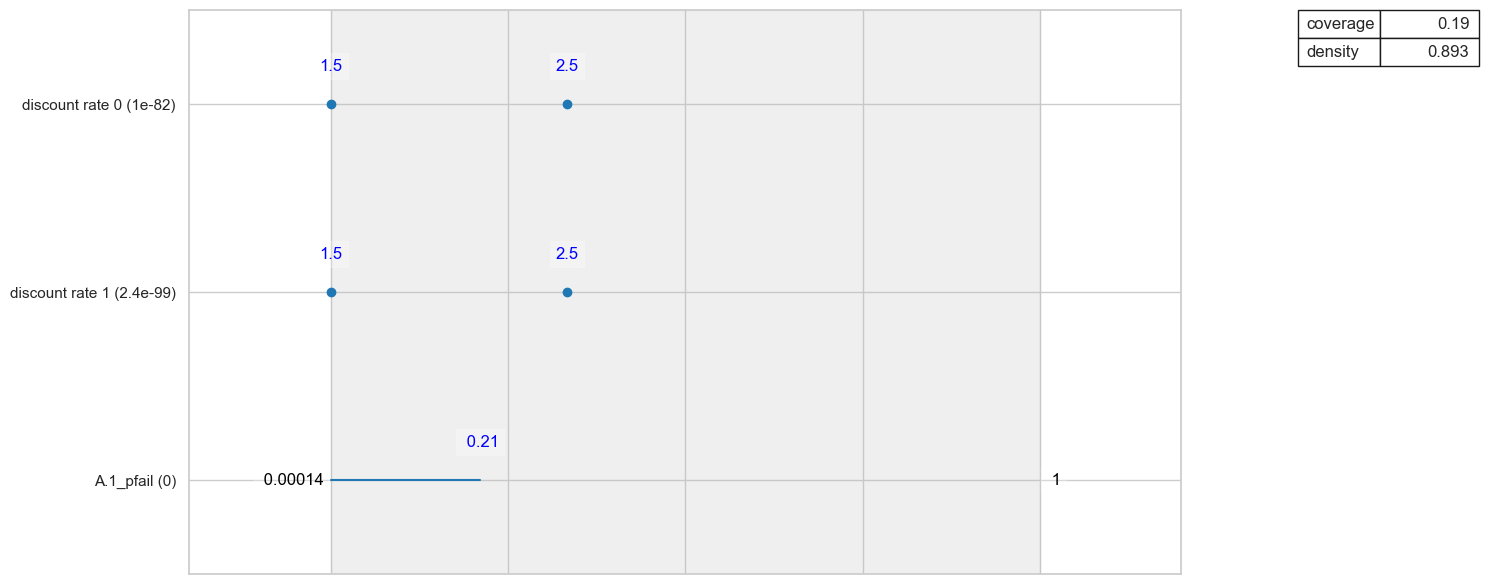

In [90]:
box.inspect()
box.inspect(style='graph')
plt.tight_layout()